# Implement the pocket algorithm
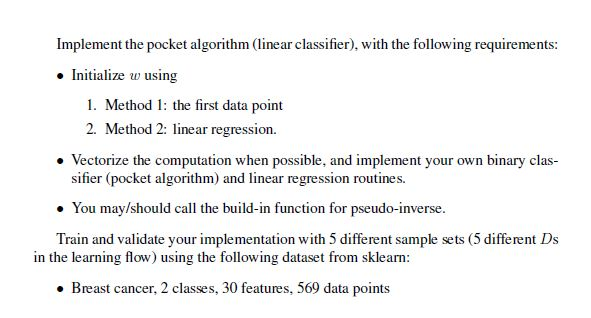 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron:
  def __init__(self, X, label, epoches, error=0.01):
    # add the 1 to the first column in X, corresponding to w0, bias b
    self.X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
    self.n_rows = self.X.shape[0]
    self.n_columns = self.X.shape[1]
    self.y = label
    # self.W = self.X[0].copy()
    self.max_eps = epoches
    self.error = error

  def W_init(self, w_i):
    # This function is used to initialize weight w
    # parameter w_i is a char: i - input; r - randomly; z - zeros; l - linear regression
    # no return, assign corresponding weight matrix
    if w_i == 'i':
      self.W = self.X[0].copy()
    elif w_i == 'r':
      self.W = np.random.random((self.n_columns,))
    elif w_i == 'z':
      self.W = np.zeros((self.n_columns,))
    elif w_i == 'l':
      self.W = np.dot(np.linalg.pinv(self.X), self.y)
      # self.W = np.dot(np.linalg.pinv(self.X), self.X)
    else:
      print('The allowed input is: i - first input, r - randomly, z - zeros!')


  def predict(self, i):
    return np.sign(np.dot(self.X[i], self.W.T))

  def evaluate(self):
    y_prv = np.sign(np.dot(self.X, self.W.T)) - self.y
    return sum(np.abs(y_prv))

  def train(self):
    for _ in range(self.max_eps):
      n_miss = 0
      if _%5000 == 0:
        print("n_iter:", _, "miss_rate:", self.evaluate()/self.n_rows, sep='\t')
      for i in range(self.n_rows):
        prv = self.predict(i)
        if prv != self.y[i]:
          n_miss += 1
          self.W = self.W + self.y[i]*self.X[i]
      # print(n_miss)
      if n_miss == 0:
        return self.w
    return self.W


class pocket(Perceptron):
  def __init__(self, X, label, epoches, error=0.01, w_i='i'):
    super(pocket, self).__init__(X, label, epoches, error=0.01) 
    self.W_init(w_i)
    self.best_W = self.W
    self.best_loss = 1
    self.loss_hist = list()

  def evaluate(self):
    y_prv = np.sign(np.dot(self.X, self.W.T)) - self.y
    return sum(np.abs(y_prv))

  def train(self):
    n_iter = 0
    while(n_iter <= self.max_eps and self.best_loss >= self.error):
      n_iter += 1
      if n_iter%5000 == 0:
        print("n_iter:", n_iter, "best_miss:", self.best_loss, sep='\t')
        # print(self.best_W[:5])
      for i in range(self.n_rows):
        if self.predict(i) != self.y[i]:
          # print('W_n:', self.W[:5], sep='\t')
          # print(self.y[i], self.X[i][:5], sep='\t')
          self.W += self.y[i]*self.X[i]
          # print('W_n+1:', self.W[:5], sep='\t')
          n_miss = self.evaluate()
          # print('best_rate:', self.best_loss, 'new_rate:', n_miss/self.n_rows, sep='\t')
          if n_miss/self.n_rows < self.best_loss:
            if self.best_loss == 1:
              print(i)
              print(self.X[i])
              print(self.W[:5])
              print(n_miss)
            self.best_loss = n_miss/self.n_rows
            self.loss_hist.append(self.best_loss)
            self.best_W = self.W.copy()
            print('best_loss:', self.best_loss, 'best_W:', self.best_W[:3], sep='\t')
            print('...................................')
    # print("n_iter:", n_iter, "n_miss:", n_miss, sep='\t')
    return self.best_W


In [48]:
import sklearn.datasets as ds 
bc = ds.load_breast_cancer()
X_bc = bc.data
y_bc = bc.target
y_bc[y_bc==0] = -1                # convert 0 to -1 in target

In [ ]:
pcptn = Perceptron(X_bc, y_bc, 100000, 0.1)
pcptn.train()
pcptn.W

In [ ]:
pkt = pocket(X_bc, y_bc, 100000, 0.1, 'l')
pkt.train()
#pkt.best_miss_rate


In [60]:
loss_mat_i = list()
loss_mat_r = list()
loss_mat_l = list()
for i in range(5):
  X_bc_train = np.concatenate((X_bc[:i*100], X_bc[(i+1)*100:]), axis=0)
  y_bc_train = np.concatenate((y_bc[:i*100], y_bc[(i+1)*100:]), axis=0)
  pkt_i = pocket(X_bc_train, y_bc_train, 1000, 0.1, 'i')
  # loss_mat_i.append(i)
  # print(loss_mat_i)
  pkt_i.train()
  loss_mat_i.append(pkt_i.loss_hist)
  pkt_r = pocket(X_bc_train, y_bc_train, 1000, 0.1, 'r')
  pkt_r.train()
  loss_mat_r.append(pkt_r.loss_hist)
  pkt_l = pocket(X_bc_train, y_bc_train, 1000, 0.1, 'l')
  pkt_l.train()
  loss_mat_l.append(pkt_l.loss_hist)



1
[1.000e+00 6.981e+00 1.343e+01 4.379e+01 1.435e+02 1.170e-01 7.568e-02
 0.000e+00 0.000e+00 1.930e-01 7.818e-02 2.241e-01 1.508e+00 1.553e+00
 9.833e+00 1.019e-02 1.084e-02 0.000e+00 0.000e+00 2.659e-02 4.100e-03
 7.930e+00 1.954e+01 5.041e+01 1.852e+02 1.584e-01 1.202e-01 0.000e+00
 0.000e+00 2.932e-01 9.382e-02]
[  1.      6.981  13.43   43.79  143.5  ]
294.0
best_loss:	0.6268656716417911	best_W:	[ 1.     6.981 13.43 ]
...................................
best_loss:	0.3283582089552239	best_W:	[ 5.    40.148 87.88 ]
...................................
best_loss:	0.18763326226012794	best_W:	[  8.     67.218 105.97 ]
...................................
best_loss:	0.1791044776119403	best_W:	[ 50.    400.417 658.36 ]
...................................
best_loss:	0.17057569296375266	best_W:	[ 68.    540.313 923.58 ]
...................................
best_loss:	0.16631130063965885	best_W:	[ 102.     799.051 1339.09 ]
...................................
best_loss:	0.16204690831556504	bes

In [59]:
loss_mat_i

[[0.6268656716417911,
  0.3283582089552239,
  0.18763326226012794,
  0.1791044776119403,
  0.17057569296375266,
  0.16631130063965885,
  0.16204690831556504,
  0.15778251599147122,
  0.1535181236673774,
  0.14925373134328357,
  0.14498933901918976,
  0.14072494669509594,
  0.13646055437100213,
  0.13219616204690832,
  0.1279317697228145,
  0.12366737739872068,
  0.11940298507462686,
  0.11513859275053305,
  0.11087420042643924,
  0.10660980810234541,
  0.1023454157782516,
  0.09808102345415778,
  0.09381663113006397],
 [0.7377398720682303,
  0.5884861407249466,
  0.19189765458422176,
  0.18336886993603413,
  0.17484008528784648,
  0.17057569296375266,
  0.16631130063965885,
  0.16204690831556504,
  0.15778251599147122,
  0.1535181236673774,
  0.14925373134328357,
  0.14498933901918976,
  0.14072494669509594,
  0.13646055437100213,
  0.13219616204690832,
  0.1279317697228145],
 [0.7249466950959488,
  0.5842217484008528,
  0.15778251599147122,
  0.1535181236673774,
  0.14498933901918976,

In [52]:
loss_mat_i = list()
type(loss_mat_i)

list

In [44]:
z = np.concatenate((X_bc[2:3], X_bc[10:13]), axis=0)
z.shape

(4, 30)

In [ ]:
W = np.random.randint(0, 100, 30)*0.01
np.dot(W.T, X_bc[0])

1096.36451335

In [ ]:
label

array([0.8, 0.8, 0.8, 0.6, 0. , 0.3, 0.1, 0.8, 0.4, 0.9])

In [ ]:
y_bc[y_bc==0] = -1